# Energy surface cuts & electronic dispersion

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as  plt

## Fig. 4a

In [7]:
# Load data
alpha_mono   = np.loadtxt('../data/monolayer_alpha.txt')
energy_mono  = np.loadtxt('../data/monolayer_energy.txt')

alpha_cell   = np.loadtxt('../data/unit_cell_alpha.txt')
energy_cell  = np.loadtxt('../data/unit_cell_energy.txt')

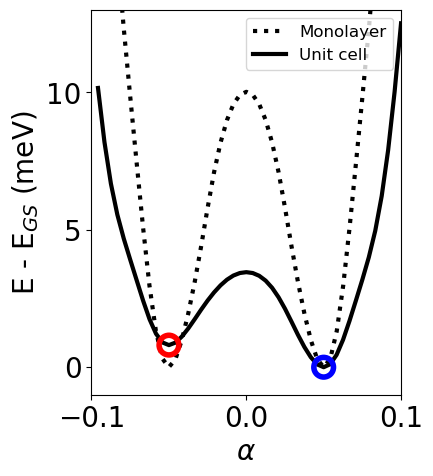

In [8]:
plt.figure(figsize=(4, 5))

# Monolayer
n = len(energy_mono)
#A0 = 0
#E0 = energy_mono[n//2]
#A2 =  alpha_mono[n//2:][np.argmin(energy_mono[n//2:])]
#E2 = energy_mono[n//2:][np.argmin(energy_mono[n//2:])]
#A1 =  alpha_mono[:n//2][np.argmin(energy_mono[:n//2])]
E1 = energy_mono[:n//2][np.argmin(energy_mono[:n//2])]

plt.plot(alpha_mono, energy_mono-E1, lw=3, c='black', label='Monolayer', ls='dotted')

# Unit cell
n = len(energy_cell)
#A0 = 0
#E0 = energy_cell[n//2]
A2 =  alpha_cell[n//2:][np.argmin(energy_cell[n//2:])]
E2 = energy_cell[n//2:][np.argmin(energy_cell[n//2:])]
A1 =  alpha_cell[:n//2][np.argmin(energy_cell[:n//2])]
E1 = energy_cell[:n//2][np.argmin(energy_cell[:n//2])]

plt.plot(alpha_cell, energy_cell-E1, lw=3, c='black', label='Unit cell', ls='-')
# Mark minima
plt.scatter(A1, E1-E1, s=200, zorder=5, facecolors='none', edgecolors='blue', lw=4, ls='-')
plt.scatter(A2, E2-E1, s=200, zorder=5, facecolors='none', edgecolors='red' , lw=4, ls='-')

# Axes ticks, limits, labels, legend
plt.xlabel(r"$\alpha$", fontsize=20)
plt.ylabel("E - E$_{GS}$ (meV)", fontsize=20)
plt.xlim(-0.1, 0.1)
plt.ylim(-0.001, 0.013)
plt.xticks([-0.1, 0, 0.1], fontsize=20)
plt.yticks(np.array([0, 5, 10]) / 1000, [0, 5, 10], fontsize=20)
plt.legend(fontsize=12, loc='upper right')

plt.show()

In [9]:
# Peak near zero
print(f"Barrier: {(energy_cell[n//4:3*n//4].max() - E1) * 1000:.3f} meV")
print(f"Metastable minimum: {(E2-E1)*1000:.3f} meV")

Barrier: 3.457 meV
Metastable minimum: 0.804 meV


## Fig S13

In [18]:
def find_gap_per_k(D, mu):
    """Find k-point specific gap size and its location."""
    # Sort eigenvalues along last axis (bands)
    sorted_eval = np.sort(D, axis=-1)
    # Find valence band maximum and conduction band minimum
    VB_mask = sorted_eval < mu
    CB_mask = sorted_eval > mu
    VB = np.where(VB_mask, sorted_eval, -np.inf).max(axis=-1)
    CB = np.where(CB_mask, sorted_eval, np.inf).min(axis=-1)
    # Calculate gaps
    gaps = CB - VB
    gaps[np.isinf(gaps)] = np.nan    
    return gaps.min(), np.where(gaps == gaps.min())
    

Minimum gap for ground state: 568 meV at k-points [407]
Minimum gap for meta state: 543 meV at k-points [140 141]


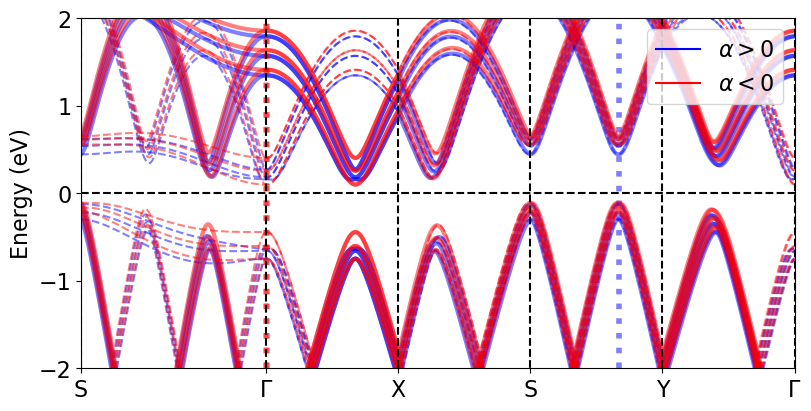

In [23]:
# Plot setup
plt.rcParams['font.size'] = 16
plt.figure(figsize=(8, 4), layout='constrained')

# Colours and opacities for ground (idx 0) and metastable (idx 1) state
opac = [0.5, 0.5]
colours = ['blue', 'red']

for i, state in enumerate(['ground', 'meta']):
    # Load data
    mu = np.load(f"../data/mu_{state}.npy")
    D_x = np.load(f"../data/D_x_{state}.npy")
    D_y = np.load(f"../data/D_y_{state}.npy")
    D_x_bf = np.load(f"../data/D_x_bf_{state}.npy")
    D_y_bf = np.load(f"../data/D_y_bf_{state}.npy")
    ticks = np.load(f"../data/idx_{state}.npy")
    
    # Plot bands
    for j in range(D_x.shape[1]):
        # Original
        plt.plot(D_x[:, j] - mu   , c=colours[i], alpha=0.5, lw=3)
        plt.plot(D_y[:, j] - mu   , c=colours[i], alpha=0.5, lw=3)
        # Backfolded
        plt.plot(D_x_bf[:, j] - mu, c=colours[i], alpha=0.5, ls='--')
        plt.plot(D_y_bf[:, j] - mu, c=colours[i], alpha=0.5, ls='--')
    
    # Get gap size and location
    gap = np.inf
    for D in [D_x, D_y, D_x_bf, D_y_bf]:
        gap, where = find_gap_per_k(D, mu)
        if gap < gap:
            gap = gap
            where = where
    print(f"Minimum gap for {state} state: {gap * 1000:.0f} meV at k-points {where[0]}")
    plt.vlines(where[0], ymin=-2, ymax=2, colors=colours[i], alpha=opac[i], linestyles='dotted', lw=4)

# Limits    
plt.xlim(0, max(ticks))
plt.ylim(-2, 2)

# Ticks, labels, legend
plt.plot([], [], ls='-', c='blue', label=r"$\alpha > 0$")
plt.plot([], [], ls='-', c='red' , label=r"$\alpha < 0$")

plt.hlines(0, 0, max(ticks), colors='k', linestyles='dashed')
plt.vlines(ticks, ymin=-7, ymax=3, colors='k', linestyles='dashed')
plt.xticks(ticks, ['S', r'$\Gamma$', 'X', 'S', 'Y', r'$\Gamma$'])

plt.ylabel("Energy (eV)")
plt.legend(loc='upper right')
    
plt.show()
